In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np 

In [2]:
df= pd.read_csv('dataset.csv')

In [3]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


### check info to understaned data 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


### check dupicates aand drop it

In [5]:
df.duplicated().sum()

401

In [6]:
df.drop_duplicates(inplace=True , ignore_index=True)

### Check for missing data

In [7]:
df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

### Remove outliers

In [8]:
from datasist.structdata import detect_outliers

In [9]:
df.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [10]:
outliers = detect_outliers(df , 0 , ["SQUARE_FT"])

In [11]:
len(outliers)

1612

In [12]:
df.drop(outliers , axis = 0 , inplace=True)

In [13]:
df.reset_index(inplace=True , drop=True)

### check corrleation

In [54]:
df.corr()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS),POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
UNDER_CONSTRUCTION,1.000000,0.367703,-0.039197,-0.125896,-1.000000,-0.351075,0.014916,0.174682,-0.233867,0.021521
RERA,0.367703,1.000000,0.013818,-0.009238,-0.367703,-0.268363,0.083434,0.239644,-0.276712,0.006633
BHK_NO.,-0.039197,0.013818,1.000000,0.755919,0.039197,0.018228,0.299178,0.066515,-0.060652,-0.051476
SQUARE_FT,-0.125896,-0.009238,0.755919,1.000000,0.125896,0.148162,0.301697,0.097217,-0.079249,-0.086503
READY_TO_MOVE,-1.000000,-0.367703,0.039197,0.125896,1.000000,0.351075,-0.014916,-0.174682,0.233867,-0.021521
RESALE,-0.351075,-0.268363,0.018228,0.148162,0.351075,1.000000,-0.007880,-0.030289,0.196630,-0.032046
TARGET(PRICE_IN_LACS),0.014916,0.083434,0.299178,0.301697,-0.014916,-0.007880,1.000000,0.251971,-0.239365,-0.012449
POSTED_BY_Dealer,0.174682,0.239644,0.066515,0.097217,-0.174682,-0.030289,0.251971,1.000000,-0.955644,0.008681
POSTED_BY_Owner,-0.233867,-0.276712,-0.060652,-0.079249,0.233867,0.196630,-0.239365,-0.955644,1.000000,-0.020216
BHK_OR_RK_RK,0.021521,0.006633,-0.051476,-0.086503,-0.021521,-0.032046,-0.012449,0.008681,-0.020216,1.000000


<AxesSubplot:>

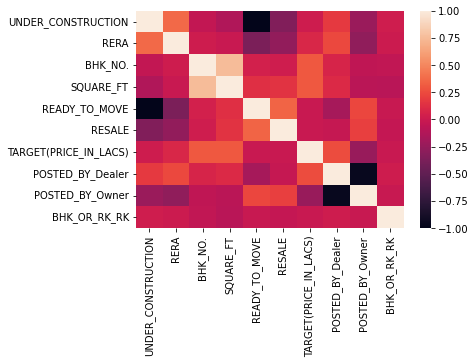

In [55]:
sns.heatmap(df.corr())

In [15]:
df['CITY']=df['ADDRESS'].apply(lambda x : x.split(',')[1])

In [16]:
from category_encoders import BinaryEncoder

In [17]:
df.drop(['CITY'],axis=1,inplace=True)

In [18]:
df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
27433,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
27434,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
27435,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
27436,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [19]:
df['SQUARE_FT']=np.log(df['SQUARE_FT'])

### let's start encoding ..

In [20]:
df['POSTED_BY'].value_counts()

Dealer     16646
Owner      10204
Builder      588
Name: POSTED_BY, dtype: int64

In [21]:
df['BHK_OR_RK'].value_counts()

BHK    27414
RK        24
Name: BHK_OR_RK, dtype: int64

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
encder = OneHotEncoder(sparse=False,drop="first")

In [24]:
transformed = encder.fit_transform(df[["POSTED_BY" ,"BHK_OR_RK"]])

In [25]:
transformed_df = pd.DataFrame(transformed , columns=encder.get_feature_names_out())

In [26]:
transformed_df

,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
...,...,...,...
27433,0.0,1.0,0.0
27434,0.0,1.0,0.0
27435,1.0,0.0,0.0
27436,0.0,1.0,0.0


In [27]:
df.reset_index(inplace=True , drop=True)

In [28]:
df = pd.concat([df , transformed_df] , axis = 1)

In [29]:
df.drop(['POSTED_BY','BHK_OR_RK'], axis = 1 , inplace=True)

In [30]:
df.drop(['ADDRESS' ,'LONGITUDE','LATITUDE'] , axis = 1 , inplace=True) 

### Split the data to train and test

In [31]:
from sklearn.model_selection import train_test_split

In [74]:
x = df.drop(['TARGET(PRICE_IN_LACS)'] , axis =1)
y=df['TARGET(PRICE_IN_LACS)']

In [114]:
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size=0.15 , random_state=8 , shuffle=True )

### Scaling the numerical features

In [115]:
from sklearn.preprocessing import StandardScaler

In [116]:
scaler= StandardScaler()

In [117]:
df.columns

Index(['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE',
       'RESALE', 'TARGET(PRICE_IN_LACS)', 'POSTED_BY_Dealer',
       'POSTED_BY_Owner', 'BHK_OR_RK_RK'],
      dtype='object')

In [118]:
col_to_scalled = ["SQUARE_FT"]

In [119]:
x_train[col_to_scalled] = scaler.fit_transform(x_train[col_to_scalled])

In [120]:
x_test[col_to_scalled] = scaler.fit_transform(x_test[col_to_scalled])

### Train the linear regression model

In [121]:
from sklearn.linear_model import LinearRegression

In [122]:
model = LinearRegression()

In [123]:
model.fit(x_train , y_train)

LinearRegression()

In [124]:
y_pred=model.predict(x_test)

In [125]:
y_pred

array([40.6324465 , 45.38635393, 37.76920963, ..., 92.47512572,
       85.37621665, 92.02989757])

In [126]:
from sklearn.metrics import mean_squared_error , r2_score

In [127]:
mean_squared_error(y_test , y_pred , squared=False)

96.23176952734083

In [128]:
model.score(x_test , y_test)

0.13918445706322202

In [129]:
model.coef_

array([ -1.53865846,   5.41920727,  22.88198985,  17.02104153,
         1.53865846, -17.29577025,  62.4975735 ,  15.84313069,
        25.76104137])

In [130]:
r2_score(y_test , y_pred )

0.13918445706322202

In [131]:
y_test

4319      60.0
26039     26.0
22986     28.0
19112    100.0
16398     63.0
         ...  
23970     85.0
20036    220.0
16017     44.0
13070     60.0
10558    230.0
Name: TARGET(PRICE_IN_LACS), Length: 4116, dtype: float64

In [132]:
x_test

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK
4319,0,0,2,-0.430726,1,1,0.0,1.0,0.0
26039,0,1,2,-0.469813,1,1,0.0,1.0,0.0
22986,0,0,2,-0.598944,1,1,0.0,1.0,0.0
19112,1,1,3,0.939526,0,1,1.0,0.0,0.0
16398,0,0,2,0.318204,1,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
23970,0,1,3,0.599198,1,1,0.0,1.0,0.0
20036,0,1,3,0.375078,1,1,1.0,0.0,0.0
16017,1,0,2,0.054882,0,1,1.0,0.0,0.0
13070,1,1,3,0.716083,0,1,0.0,1.0,0.0


In [133]:
model.predict([[1,0,2,0.588750,0,1,1.0,0.0,0.0]])

D:\anaconda\envs\epsilon_eslam\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([101.56212296])

In [134]:
r2_score(y_test , y_pred)

0.13918445706322202